<code>

**ОРГАНИЗАЦИОННАЯ ИНФОРМАЦИЯ**

Что мы сделаем на этом шаге?
→ Посмотрим на данные.

→ Посмотрим, где у нас пропуски.

→ Определим тип признаков.

<code>

Первоначальная версия датасета состоит из десяти столбцов, содержащих следующую информацию:

* **Restaurant_id** — идентификационный номер ресторана / сети ресторанов;
* **City** — город, в котором находится ресторан;
* **Cuisine Style** — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
* **Ranking** — место, которое занимает данный ресторан среди всех ресторанов своего города;
* **Rating** — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
* **Price Range** — диапазон цен в ресторане;
* **Number of Reviews** — количество отзывов о ресторане;
* **Reviews** — данные о двух отзывах, которые отображаются на сайте ресторана;
* **URL_TA** — URL страницы ресторана на TripAdvisor;
* **ID_TA** — идентификатор ресторана в базе данных TripAdvisor.

In [1]:
# Импортируем библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
from collections import Counter
import random
from math import fabs

df = pd.read_csv('./main_task_new.csv')
display(df.sample(5))
display(df.info())

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
20406,id_1301,Dublin,"['Irish', 'Pub']",1304.0,4.0,NaN,5.0,"[['Our favourite pub in blackrock', 'A crackin...",/Restaurant_Review-g186605-d6525673-Reviews-Th...,d6525673
1405,id_445,Brussels,"['Italian', 'European', 'Vegetarian Friendly']",446.0,4.0,$$$$,211.0,"[['Excellent', 'Very good modern Italian cuisi...",/Restaurant_Review-g188644-d1078160-Reviews-Se...,d1078160
39820,id_13543,Paris,NaN,13545.0,2.5,NaN,23.0,"[['Ok for breakfast', 'Nice'], ['09/03/2017', ...",/Restaurant_Review-g187147-d8297185-Reviews-Mc...,d8297185
23574,id_2784,Rome,"['Italian', 'International', 'Mediterranean', ...",2785.0,5.0,$$ - $$$,38.0,"[['The Best Cafe In Rome!!!'], ['09/17/2017']]",/Restaurant_Review-g187791-d12161807-Reviews-C...,d12161807
39911,id_1162,Amsterdam,"['Bar', 'European']",1165.0,4.0,$$ - $$$,90.0,"[['Try the space cakes', 'Perfect base in Amst...",/Restaurant_Review-g188590-d4090558-Reviews-Th...,d4090558


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


None

<code>

Визуально мы может увидеть, что признаки **'URL_TA', 'ID_TA'** схожи и один содержит в себе другой, кроме того
обычно такие данные не несут в себе полезной информации, генерируются случайным образом. Поэтому просто удалим их.

In [2]:
# На первом этапе для создания такого датафрейма давайте просто удалим столбцы, содержащие данные типа object, 
# и заполним пропущенные значения (None или NaN) каким-то одним значением (нулём или средним арифметическим) для всего столбца.

df = df.drop(['URL_TA', 'ID_TA'], axis = 1)

<code>

**Теперь предстоит:**

Поработать с другими признаками и посмотреть какую информацию мы можем из них извлечь.

In [3]:
# Пустые значения в столбце количества отзывов заполним средним значением.
df['Number of Reviews'] = df['Number of Reviews'].fillna(df['Number of Reviews'].mean())
df.info()
# Заполнение нулями или медианным значением, не принесли существенных изменений в качестве работы модели.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  40000 non-null  float64
 7   Reviews            40000 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.4+ MB


In [4]:
# Для удобства работы, переименуем столбцы.
display(df.sample(5))
df.columns = ['restaurant_id', 'city', 'cuisine', 'ranking', 'rating', 'price_range', 
              'number_of_reviews', 'reviews']

display(df.sample(5))

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews
24876,id_2101,Budapest,"['European', 'Turkish', 'Hungarian']",2102.0,4.0,$,5.00000,"[['okay', 'Excellent place to have a quick lun..."
13430,id_3541,Milan,['Italian'],3543.0,4.5,NaN,6.00000,"[['Il migliore'], ['12/17/2015']]"
2106,id_864,Bratislava,NaN,865.0,2.0,NaN,14.00000,"[['terrible', 'no real value'], ['08/24/2016',..."
8355,id_10848,Paris,['Italian'],10850.0,4.0,NaN,124.82548,"[[], []]"
5473,id_12890,Paris,"['Chinese', 'Asian']",12892.0,3.0,$,53.00000,"[['PIG OUT', 'Chicken wings or Shrimps fan?'],..."


,restaurant_id,city,cuisine,ranking,rating,price_range,number_of_reviews,reviews
32376,id_5889,Barcelona,NaN,5890.0,4.0,NaN,124.82548,"[[], []]"
23926,id_7180,London,"['Pizza', 'Italian', 'Vegetarian Friendly']",7189.0,4.0,$$ - $$$,25.00000,"[['Love this pizza', 'Fab pizza in the heart o..."
13444,id_5456,Madrid,['American'],5459.0,4.0,$$ - $$$,14.00000,"[['Charming', 'Bad service'], ['03/28/2016', '..."
38141,id_3052,Lisbon,"['Steakhouse', 'Grill']",3055.0,3.5,$$ - $$$,7.00000,"[['Nice meat', 'Disappointing experience'], ['..."
34285,id_8045,Madrid,['Spanish'],8052.0,3.5,$$ - $$$,8.00000,"[[], []]"


In [5]:
# Сколько вариантов непустых значений встречается в столбце Price Range?

display(df.price_range.value_counts())
display(df.price_range.value_counts().sum())

$$ - $$$    18412
$            6279
$$$$         1423
Name: price_range, dtype: int64

26114

In [6]:
# Мы видим, что представлено 3 ценовых сегмента, большинство ресторано находится в среднем ценовом сегменте и
# всего у нас есть 26114 заполненных значений из 40000, то есть пропусков довольно много, и надо решить как их заполнить.

# Кроме это, можно сделать три отдельных признака, по трём этим категориям и посмотреть распределение каждого из них.

df['price_range'] = df['price_range'].fillna('$$ - $$$')
df['low_cost'] = df['price_range'].apply(lambda x: 1 if x == '$$ - $$$' else 0)
df['midle_cost'] = df['price_range'].apply(lambda x: 1 if x == '$' else 0)
df['high_cost'] = df['price_range'].apply(lambda x: 1 if x == '$$$$' else 0)
display(df.sample(5))

,restaurant_id,city,cuisine,ranking,rating,price_range,number_of_reviews,reviews,low_cost,midle_cost,high_cost
36932,id_4730,London,"['Indian', 'Asian', 'Balti', 'Vegetarian Frien...",4738.0,4.0,$$ - $$$,107.0,[['A jolly meal out with some entertaining st....,1,0,0
31880,id_561,Krakow,['European'],562.0,4.0,$$ - $$$,37.0,"[['Good coffe', 'Surprisingly awesome'], ['10/...",1,0,0
8472,id_100,Oslo,"['Indian', 'Asian', 'Vegetarian Friendly', 'Ve...",101.0,4.0,$,236.0,[['Still the best simple place for Imdian foo....,0,1,0
12206,id_6643,Madrid,NaN,6646.0,3.5,$$ - $$$,4.0,"[['One for the locals'], ['07/31/2016']]",1,0,0
939,id_702,Lyon,NaN,703.0,4.5,$$ - $$$,35.0,"[['Very good and fresh fish', 'A Great Find'],...",1,0,0


False    40000
Name: city, dtype: int64

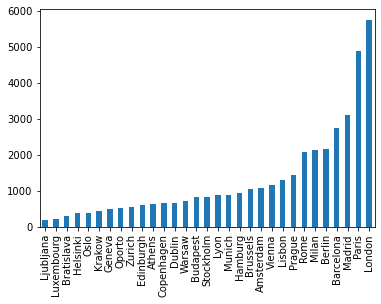

31

In [7]:
# Сколько городов представлено в наборе данных?

display(df.city.isna().value_counts())
df['city'].value_counts(ascending=True).plot(kind='bar')
plt.show()
display(df.city.value_counts().nunique())

# Города представлены корректно и без пропусков. Всего 31 город.

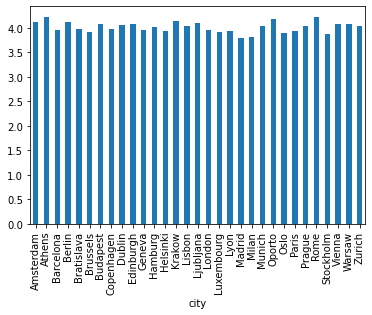

,restaurant_id,city,cuisine,ranking,rating,price_range,number_of_reviews,reviews,low_cost,midle_cost,high_cost,city_rating
5761,id_1136,Oporto,['Cafe'],1137.0,4.5,$$ - $$$,2.0,"[[], []]",1,0,0,4.18
13156,id_1319,Lyon,NaN,1344.0,5.0,$$ - $$$,6.0,"[[], []]",1,0,0,3.95
18294,id_2736,Amsterdam,NaN,2743.0,4.0,$$ - $$$,2.0,"[['Good Chinese'], ['06/07/2017']]",1,0,0,4.13
29734,id_1711,Madrid,"['Spanish', 'French']",1713.0,4.0,$$$$,150.0,"[['Nice lunch', 'Good Lunch'], ['03/26/2017', ...",0,0,1,3.80
37576,id_5539,Paris,"['Steakhouse', 'Grill']",5540.0,3.0,$$ - $$$,1202.0,"[['Good meat', 'Good fast food'], ['11/14/2017...",1,0,0,3.94


In [8]:
# Посмотрим, как рейтинг зависит от города.

# Можно посчитать коэффициент города, выведя средний рейтинг ресторанов или медианный
# или и тот и другой для каждого города отдельно.
# И каждое значение города заменить этим коэффициентом, получив таким образов числовой признак.

df.groupby(['city'])['rating'].mean().plot(kind='bar')
plt.show()

# Создадим новый признак, где будет рейтинг города, определюящийся как среднее значение рейтинга ресторанов в этом городе.
df_city_rating = df.groupby(['city'])['rating'].mean()
df['city_rating'] = df['city'].apply(lambda x: round(df_city_rating[x], 2))
display(df.sample(5))

In [9]:
# Посмотрим, какая кухня представлена в наибольшем количестве ресторанов.
count = Counter()
for i in df.index:
    if pd.isnull(df.cuisine[i]):
        count.update(Counter(["'Other'"])) # Пропуски заполним значением other.
    else:
        count.update(Counter(df.cuisine[i].strip('[]').split(', '))) # Разобъём строку на слова разделённые ", "

series_count = pd.Series(dict(count))
display(series_count.sort_values(ascending=False))


def number_of_cuisine(cell):
    '''Функция считает, сколько кухонь представлено в ресторане'''
    return len(cell.split(','))

df_cuisine = df.cuisine.apply(lambda x: 1 if pd.isnull(x) else number_of_cuisine(x)) # Создаём столбец с количеством кухонь.
display('Среднее', df_cuisine.mean()) # Находим среднее.
display('Минимум', df_cuisine.min())
display('Максимум', df_cuisine.max())

# Сделаем новый признак, где будем количество кухонь указывать относительно среднего значения.
df['cuisine_rating'] = df['cuisine'].apply(lambda x: 1 / df_cuisine.mean()if pd.isnull(x) 
                                           else number_of_cuisine(x) / df_cuisine.mean())

display(df['cuisine_rating'].isna().value_counts())
df.sample(5)

'Vegetarian Friendly'    11189
'European'               10060
'Other'                   9283
'Mediterranean'           6277
'Italian'                 5964
                         ...  
'Salvadoran'                 1
'Yunnan'                     1
'Xinjiang'                   1
'Burmese'                    1
'Latvian'                    1
Length: 126, dtype: int64

'Среднее'

2.6224

'Минимум'

1

'Максимум'

21

False    40000
Name: cuisine_rating, dtype: int64

,restaurant_id,city,cuisine,ranking,rating,price_range,number_of_reviews,reviews,low_cost,midle_cost,high_cost,city_rating,cuisine_rating
33358,id_728,Milan,"['Vegetarian Friendly', 'Gluten Free Options']",730.0,5.0,$,50.0,"[['A New Favorite!'], ['07/29/2017']]",0,1,0,3.82,0.76266
1709,id_19,Krakow,"['French', 'European', 'Central European', 'Ve...",20.0,4.5,$$$$,1250.0,"[['Exquisite Food', 'Excellent Restaurant'], [...",0,0,1,4.15,1.90665
30641,id_583,Brussels,"['Belgian', 'European', 'Brew Pub']",584.0,3.5,$$ - $$$,314.0,"[['Nice moules, friendly service', 'Mussels in...",1,0,0,3.91,1.14399
11890,id_9668,Paris,['French'],9670.0,3.5,$$ - $$$,13.0,"[[], []]",1,0,0,3.94,0.38133
30422,id_5924,London,"['American', 'Vegetarian Friendly', 'Halal', '...",5933.0,3.5,$$ - $$$,101.0,"[['Meaty meal', 'Great Burgers, reasonable pri...",1,0,0,3.96,1.52532


In [10]:
def list_of_reviews(cell):
    """Функци делит строку на две, отделяя отзывы от дат"""
    list_review = []
    list_reviews = cell.split('], [')
    for text in list_reviews:
        if '[' in text:
            list_review.append(text.strip('[]'))
        elif ']' in text:
            list_review.append(text.strip('[]'))
    return list_review[0]                # Возвращает первый элемент списка - строку отзывов.

def dates_of_reviews(cell):
    """Функци делит строку на две, отделяя отзывы от дат"""
    list_review = []
    list_reviews = cell.split('], [')
    for text in list_reviews:
        if '[' in text:
            list_review.append(text.strip('[]'))
        elif ']' in text:
            list_review.append(text.strip('[]'))
    return list_review[1]                # Возвращает второй элемент списка - строку дат.

# Записываем в столбец дат произвольную дату, если нет отзывов.
df['dates'] = df.reviews.apply(lambda x: '01/01/2020' if len(x.split("', '")) == 1 else dates_of_reviews(x))
# display(df.sample(5))

# Чтобы удалить строки, без отзывов сначала записываем туда пропуск, потом удаляем.
# df['dates'] = df.reviews.apply(lambda x: None if len(x.split("', '")) == 1 else dates_of_reviews(x))
# df = df.dropna(subset=['dates']) # Удалим строки, где есть пропуски с ревью, оказалось, что модель так работает намного лучше.

# Записываем в столбец ревью 'Other', если нет отзывов.
df['reviews'] = df.reviews.apply(lambda x: 'Other' if len(x.split("', '")) == 1 else list_of_reviews(x))
# display(df.sample(5))

# Записываем в первый столбец первую дату.
df['dates_1'] = df.dates.apply(lambda x: '01/01/2020' if len(x.split("', '")) == 1 
                               else x.split("', '")[0].strip("'"))
df['dates_2'] = df.dates.apply(lambda x: '01/01/2020' if len(x.split("', '")) == 1 
                               else x.split("', '")[1].strip("'"))
# display(df.sample(5))
display(df['dates_1'].count()) # Проверили, что нет пропусков
display(df['dates_2'].count())

df.dates_1 = pd.to_datetime(df.dates_1) # Переводим в формат datetime для работы с датами.
df.dates_2 = pd.to_datetime(df.dates_2)

df['dates'] = df.dates_1 - df.dates_2
df['dates'] = df['dates'].apply(lambda x: fabs(int(str(x).split(" ")[0])))  # Оставляем числовую часть (дни), по модулю.
df['dates'] = df['dates'].apply(lambda x: random.randint(0, 500) if x == 0 else x)

display(df['dates'].value_counts())
display(df.sample(5))

40000

40000

1.0       684
2.0       540
3.0       513
4.0       453
5.0       434
         ... 
1432.0      1
1083.0      1
843.0       1
1216.0      1
2125.0      1
Name: dates, Length: 1228, dtype: int64

,restaurant_id,city,cuisine,ranking,rating,price_range,number_of_reviews,reviews,low_cost,midle_cost,high_cost,city_rating,cuisine_rating,dates,dates_1,dates_2
11072,id_10561,London,"['Chinese', 'Fast Food', 'Asian']",10571.0,3.5,$,33.0,"'Good value', 'Birthday buffet!'",0,1,0,3.96,1.14399,278.0,2018-01-02,2017-03-30
39901,id_2366,Paris,"['French', 'Mediterranean', 'European', 'Seafo...",2367.0,4.0,$$ - $$$,165.0,"'Excellent Seafood, Wine, Atmosphere', 'Great ...",1,0,0,3.94,1.52532,35.0,2017-10-08,2017-09-03
28028,id_2469,Hamburg,NaN,2474.0,3.0,$$ - $$$,27.0,"'A nice and cosy restaurant, good in the su......",1,0,0,4.02,0.38133,693.0,2017-02-07,2015-03-17
36791,id_12302,London,NaN,12312.0,4.0,$$ - $$$,6.0,"'Eat. London', 'Always feel welcome'",1,0,0,3.96,0.38133,414.0,2016-12-28,2015-11-10
11787,id_8044,Madrid,NaN,8051.0,2.5,$$ - $$$,28.0,Other,1,0,0,3.80,0.38133,343.0,2020-01-01,2020-01-01


In [11]:
# Поскольку в городе, где больше ресторанов, сложнее получить высокое место в рейтинге, попробуем
# сделать признак, где поделим место в рейтинге, на количество ресторанов в этом городе.

df_city_ranking = df['city'].value_counts()
display(df_city_ranking.sample(15))
df['city_ranking'] = df['ranking'] / df['city'].apply(lambda x: round(df_city_ranking[x], 2))
df['city_ranking']

# При проверке признак хорошо улучшил качество модели.

Athens         628
Zurich         538
Rome          2078
Geneva         481
Hamburg        949
Munich         893
Krakow         443
Luxembourg     210
Warsaw         727
Lyon           892
Prague        1443
Bratislava     301
Paris         4897
Edinburgh      596
Berlin        2155
Name: city, dtype: int64

0        1.137431
1        1.874390
2        0.061317
3        1.604640
4        0.695409
           ...   
39995    0.234412
39996    1.294874
39997    2.014634
39998    0.881706
39999    2.263010
Name: city_ranking, Length: 40000, dtype: float64

In [12]:
# Подготовим датасет к обработке, удалим ненужные столбцы.

df = df.drop(['dates_1', 'dates_2', 'cuisine', 'reviews', 'price_range', 'restaurant_id', 'city'], axis = 1)
display(df)
df['ranking'].min()

,ranking,rating,number_of_reviews,low_cost,midle_cost,high_cost,city_rating,cuisine_rating,dates,city_ranking
0,5570.0,3.5,194.0,1,0,0,3.94,1.143990,41.0,1.137431
1,1537.0,4.0,10.0,1,0,0,3.87,0.381330,382.0,1.874390
2,353.0,4.5,688.0,0,0,1,3.96,2.669311,2.0,0.061317
3,3458.0,5.0,3.0,1,0,0,4.12,0.381330,132.0,1.604640
4,621.0,4.0,84.0,1,0,0,4.05,1.143990,272.0,0.695409
...,...,...,...,...,...,...,...,...,...,...
39995,500.0,4.5,79.0,1,0,0,3.82,1.525320,34.0,0.234412
39996,6341.0,3.5,542.0,1,0,0,3.94,1.906650,9.0,1.294874
39997,1652.0,4.5,4.0,1,0,0,3.87,0.762660,3127.0,2.014634
39998,641.0,4.0,70.0,1,0,0,4.09,1.906650,23.0,0.881706


1.0

In [13]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['rating'], axis = 1)  
y = df['rating']

# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split  

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели
      
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)
      
# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)
      
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактич0еских.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2152845
